# *Importing the required modules*

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random


# Load the training and test data

In [2]:
X_train = np.loadtxt('train_X.csv', delimiter=',').T
Y_train = np.loadtxt('train_label.csv', delimiter=',').T
X_test = np.loadtxt('test_X.csv', delimiter=',').T
Y_test = np.loadtxt('test_label.csv', delimiter=',').T

# Print the shapes of the data

In [3]:
print("Shape of X_train:", X_train.shape)
print("Shape of Y_train:", Y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of Y_test:", Y_test.shape)


Shape of X_train: (784, 1000)
Shape of Y_train: (10, 1000)
Shape of X_test: (784, 350)
Shape of Y_test: (10, 350)


# Visualize a random training example

Random training example at index: 246


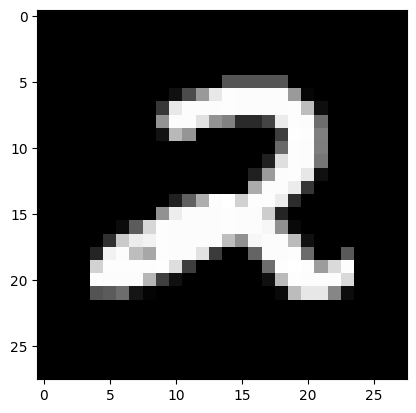

In [4]:
index = random.randrange(0, X_train.shape[1])
print("Random training example at index:", index)
plt.imshow(X_train[:, index].reshape(28, 28), cmap='gray')
plt.show()

# Activation functions


In [5]:
def tanh(x):
    return np.tanh(x)

def relu(x):
    return np.maximum(x, 0)

def softmax(x):
    expX = np.exp(x)
    return expX / np.sum(expX, axis=0)

def derivative_tanh(x):
    return 1 - np.power(np.tanh(x), 2)

def derivative_relu(x):
    return np.where(x > 0, 1, 0)

# Initialize neural network parameters

In [6]:
def initialize_parameters(n_x, n_h, n_y):
    w1 = np.random.randn(n_h, n_x) * 0.01
    b1 = np.zeros((n_h, 1))
    
    w2 = np.random.randn(n_y, n_h) * 0.01
    b2 = np.zeros((n_y, 1))
    
    parameters = {
        "w1": w1,
        "b1": b1,
        "w2": w2,
        "b2": b2
    }
    
    return parameters


# Forward propagation

In [7]:
def forward_propagation(x, parameters):
    w1, b1, w2, b2 = parameters.values()
    
    z1 = np.dot(w1, x) + b1
    a1 = tanh(z1)
    
    z2 = np.dot(w2, a1) + b2
    a2 = softmax(z2)
    
    forward_cache = {
        "z1": z1,
        "a1": a1,
        "z2": z2,
        "a2": a2
    }
    
    return forward_cache


# Cost function


In [8]:
def cost_function(a2, y):
    m = y.shape[1]
    cost = -(1 / m) * np.sum(y * np.log(a2))
    return cost


# Backward propagation

In [9]:
def backward_propagation(x, y, parameters, forward_cache):
    w1, b1, w2, b2 = parameters.values()
    a1 = forward_cache["a1"]
    a2 = forward_cache["a2"]

    m = x.shape[1]
    
    dz2 = a2 - y
    dw2 = (1 / m) * np.dot(dz2, a1.T)
    db2 = (1 / m) * np.sum(dz2, axis=1, keepdims=True)
    
    dz1 = (1 / m) * np.dot(w2.T, dz2) * derivative_tanh(a1)
    dw1 = (1 / m) * np.dot(dz1, x.T)
    db1 = (1 / m) * np.sum(dz1, axis=1, keepdims=True)
    
    gradients = {
        "dw1": dw1,
        "db1": db1,
        "dw2": dw2,
        "db2": db2
    }
    
    return gradients


# Update parameters

In [10]:
def update_parameters(parameters, gradients, learning_rate):
    for param in parameters:
        parameters[param] -= learning_rate * gradients[f'd{param}']
    
    return parameters

# Training the neural network

In [11]:
def train_neural_network(x, y, n_h, learning_rate, iterations):
    n_x, n_y = x.shape[0], y.shape[0]
    cost_list = []
    parameters = initialize_parameters(n_x, n_h, n_y)
    
    for i in range(iterations):
        forward_cache = forward_propagation(x, parameters)
        cost = cost_function(forward_cache['a2'], y)
        gradients = backward_propagation(x, y, parameters, forward_cache)
        parameters = update_parameters(parameters, gradients, learning_rate)
        cost_list.append(cost)
        
        if i % (iterations / 10) == 0:
            print("Cost after", i, "iterations is:", cost)
    
    return parameters, cost_list

# Define hyperparameters

In [12]:

iterations = 100
n_h = 1000
learning_rate = 0.02

# Train the neural network

In [13]:
Parameters, Cost_list = train_neural_network(X_train, Y_train, n_h, learning_rate, iterations)


Cost after 0 iterations is: 2.357673000188397
Cost after 10 iterations is: 1.1833567785413368
Cost after 20 iterations is: 0.827183696234975
Cost after 30 iterations is: 0.6588759539165846
Cost after 40 iterations is: 0.5582084813226857
Cost after 50 iterations is: 0.48940452379288174
Cost after 60 iterations is: 0.438329323799469
Cost after 70 iterations is: 0.39826838004943943
Cost after 80 iterations is: 0.3656072882217131
Cost after 90 iterations is: 0.3382161699946571


# Plot the cost over iterations

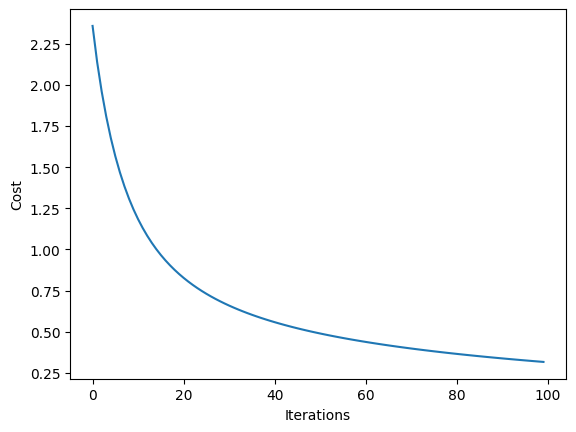

In [14]:
t = np.arange(0, iterations)
plt.plot(t, Cost_list)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()


# Evaluate the model's accuracy

In [15]:

def evaluate_accuracy(inp, labels, parameters):
    forward_cache = forward_propagation(inp, parameters)
    a_out = forward_cache['a2']
    a_out = np.argmax(a_out, axis=0)
    labels = np.argmax(labels, axis=0)
    accuracy = np.mean(a_out == labels) * 100
    return accuracy

train_accuracy = evaluate_accuracy(X_train, Y_train, Parameters)
test_accuracy = evaluate_accuracy(X_test, Y_test, Parameters)

print("Accuracy of Train Dataset:", train_accuracy, "%")
print("Accuracy of Test Dataset:", round(test_accuracy, 2), "%")

Accuracy of Train Dataset: 95.5 %
Accuracy of Test Dataset: 85.43 %


# Make predictions on a random test example

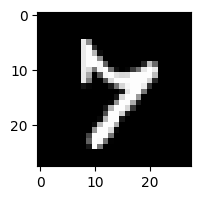

The number is : 7


In [26]:

idx = int(random.randrange(0, X_test.shape[1]))
plt.figure(figsize=(2, 2))
plt.imshow(X_test[:, idx].reshape((28, 28)), cmap='gray')
plt.show()

cache = forward_propagation(X_test[:, idx].reshape(X_test[:, idx].shape[0], 1), Parameters)
a_pred = cache['a2']
a_pred = np.argmax(a_pred, 0)

print("The number is :", a_pred[0])
